# First Fullfill of Basic Requirements

Import Necessary Libraries and fullfill basic requirements

Import Basic Libraries

In [1]:
import numpy as np # basic math operations
import pandas as pd # data manipulation and analysis
import seaborn as sns
import matplotlib.pyplot as plt
import re # regular expression
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

Import sklearn Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


Import NLP Libraries

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [ ]:
# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
# fig.set_size_inches(10, 6)
plt.rcParams["figure.figsize"] = (12, 8)  # the size of A4 paper use (11.7, 8.27)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
# !pip install termcolor

In [ ]:
# !pip install -U pandas-profiling --user

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# !apt install python-colorama


In [7]:
# !pip install termcolor

# from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact



# import pandas_profiling
# from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

Insert data

In [9]:


# from google.colab import files

# uploaded = files.upload()

# import pandas as pd
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Womens Clothing E-Commerce Reviews.csv']))
# print(df)
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews (1).csv")


#Exploratory  Data Analysis

In [10]:
#@title Feature selection
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Now we will drop all unnecessary features and only focus on review_text and recommended_ind

In [11]:
df.drop(['Clothing ID', 'Age', 'Title', 'Rating',
        'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],axis=1, inplace=True)


In [12]:
df.sample(4)

,Unnamed: 0,Review Text,Recommended IND
512,512,"Beautiful colors, especially the pink. i am 5'3"" and about 124 lb. i got the small petite but am thinking of exchanging it for the regular xs. not only is it short hem-wise, which i don't really m...",1
14105,14105,Comfortable with leggings or cropped skinnies. would be better as a solid as opposed to a plaid print. breathable and airy fabric.,1
22410,22410,"I was excited to see this top on sale as i had been watching it for a few weeks. unfortunately, i was very disappointed when i received it. it is, as a previous person said, very much like a pajam...",0
14740,14740,"This has a unique style and feel to the fabric which i like. however, the color is not orange as advertised. it's more or a reddish pink tone which was somewhat disappointing because orange is wha...",1


In [13]:
df.columns

Index(['Unnamed: 0', 'Review Text', 'Recommended IND'], dtype='object')

In [17]:
#@title Missing Values Analysis
df['Review Text'].isnull().value_counts()

False    22641
Name: Review Text, dtype: int64

Observation: Means 845 Review Text values are null

In [15]:
df['Recommended IND'].isnull().value_counts()

False    23486
Name: Recommended IND, dtype: int64

In [16]:
df=df.dropna()

After Dropna

In [18]:
df['Review Text'].isnull().value_counts()

False    22641
Name: Review Text, dtype: int64

In [19]:
df['Recommended IND'].isnull().value_counts()

False    22641
Name: Recommended IND, dtype: int64

Observation : There were total 845 rows where Review Text was Null means No review so from dropna function we remove all those rows which was containing Null values

In [ ]:
# missing_values(df)

Sometimes we cannot detect missing values if they consist of empty strings such as " " In this situation we can use following syntax

In [21]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

Observation: Fortunately there was not such case in our data set

# NLP preprocessing
tokenization, lowerization, Lemmatization

In [22]:
def cleaning_fsa(data):

    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)

    #2. Tokenize
    text_tokens = word_tokenize(text.lower())

    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

Text Minining:
Now we will focus on Text preprocessing to make it noise free

we will follow three steps

1. Tokenization: splitting a sentence/paragraph/phrase into smaller units like words and these units are called tokens

2.Noise removal: Text which not relevant to context of data adversaly affect our output such as stop words(commonly used words like is,am, the,of etc,), then url , upper and lower case differentiation, punctuation etc.So it is beneficial to remove all of them

3.Lexicon Normalization: Another type of textual noise is multiple times representations of same word like play, player, played etc.They all are representing same meaning So there are two methods of lexicon normalization

1. Stemming  2. Lemmatization

most oftenly Lemmatization prefer because it will return the root form of each word(rather than just stripping suffixes which is stemming  )

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

Now we will use nltk Library for all above operations

# Tokenization, Noise Removal  & Lexicon Normalization

In [ ]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
     # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerinden temizleme

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
    # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
print(stop_words,end=" ")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:

df["Review Text"] = df["Review Text"].apply(cleaning_fsa)
df["Review Text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

Observation: Hence we can see all noise has been removed

In [ ]:
# " ".join(df["Review Text"]).split()

In [23]:
#@title To count frequency of each word
word_values = pd.Series(" ".join(df["Review Text"]).split()).value_counts()
word_values

the            74698
i              49630
and            48505
a              42632
it             37302
               ...  
kindof             1
lengh,,            1
33-year-old        1
gushing,           1
platinum           1
Length: 38473, dtype: int64

In [25]:
#@title Rare words
rare_words = word_values[word_values <= 2]
rare_words

great--           2
nonetheless...    2
gorgeous...       2
(4)               2
northeast         2
                 ..
kindof            1
lengh,,           1
33-year-old       1
gushing,          1
platinum          1
Length: 26593, dtype: int64

In [26]:
len(rare_words)

26593

In [27]:
# rare_words.index

Word Cloud- Repitition of words
Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We are expected to create separate word clouds for positive and negative reviews. As such we can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud




Detect positive and Negative reviews

In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

In [ ]:
df[df["Recommended IND"] == 0]

,Review Text,Recommended IND
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0
22,first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...,0
25,loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean,0
...,...,...
23449,tried color really pretty fun donset want pair comfycute pant looked awful muscular thigh dont think cut falttering population also comfortable looked crotch seemed little low though pant correct ...,0
23450,wanted love jacket soft great color unfortunately light weight almost like shirt fabric nice heft fabric though nice length accept sleeve short small right size looking something slightly warmer l...,0
23460,purchased good price typically love maeve winwin fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better...,0
23478,surprised positive review product terrible cut weird place make look wide skirt also like picture darker heavier material isnt great return,0


In [ ]:
df[df["Recommended IND"] == 1]

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet siz...,1
...,...,...
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance pr...,1
23481,happy snag dress great price easy slip flattering cut color combo,1
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok,1
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...,1


In [ ]:
# " ".join(df["Review Text"]).split()

In [ ]:
df["Recommended IND"].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

In [ ]:
neg_words = " ".join(df[df["Recommended IND"] == 0]["Review Text"]).split()
# neg_words

output:  """ 'fit',
 'ok',
 'shape',
 'flattering',
 'love',
 'baby',
 'doll',
 'dress',
 'top',
 'tent',
 'dau  """

In [ ]:
pos_words =" ".join(df[df["Recommended IND"] == 1]["Review Text"]).split()
# pos_words

output
'absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened

Observation: Review Text.split will give all words of our review and we are extracting which were the positive words and negative words (based on the recommended index value is 1 or 0)

# Now lets create word cloud for most common words

In [ ]:
review_text = df["Review Text"]

In [ ]:
all_words = " ".join(df["Review Text"])

In [ ]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

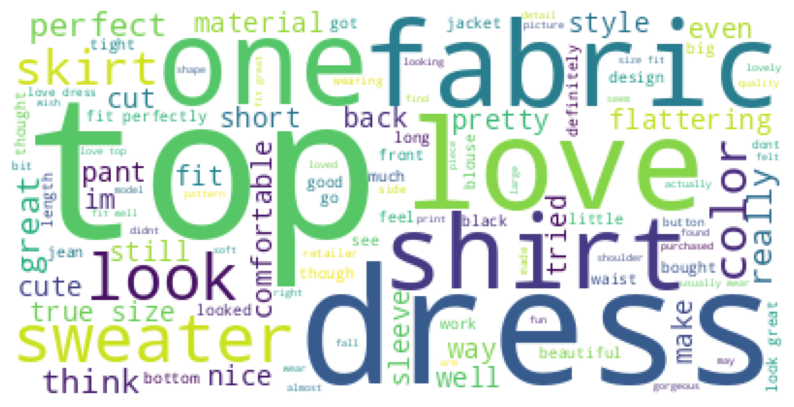

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words) # WordCloud library in Python.

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

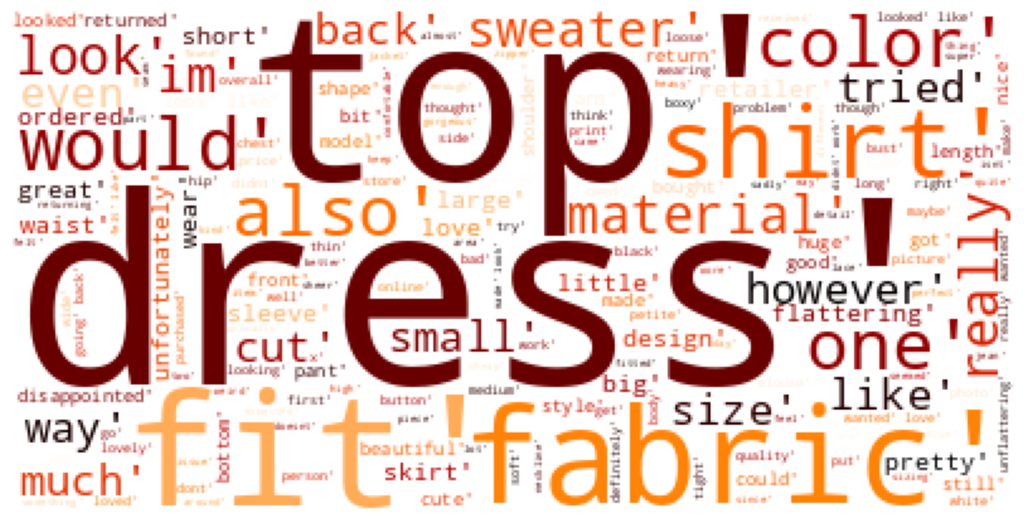

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Classification with Machine Learning

ML Algorithms most often take numeric feature vectors as input So here we need to convert each document into a numeric vector And this process is known as tect Vectorization [vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

And After performing data preprocessing , we will build models using following
1. Logistic Regression
2. Naive Bayes
3. Ada Boost


In [28]:
#@title Train /Test Split
from sklearn.model_selection import train_test_split

In [30]:
X = df["Review Text"] #  Input Features
y= df["Recommended IND"]  # Target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [32]:
#@title Word2Vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the punkt tokenizer

# Sample corpus
#For testing the code
corpus = [
    'I love natural language processing',
    'Word embeddings are powerful',
    'Deep learning is fascinating',
    'Machine learning is exciting'
]

# Tokenize the corpus
tokenized_corpus_train = [word_tokenize(sentence.lower()) for sentence in X_train]
tokenized_corpus_test = [word_tokenize(sentence.lower()) for sentence in X_test]

# Train Word2Vec model with CBOW
vector_size = 100  # You can adjust the dimensionality of the word vectors
window = 5
min_count = 1

model_cbow_train = Word2Vec(sentences=tokenized_corpus_train, vector_size=vector_size, window=window, sg=0, min_count=min_count)
model_cbow_test = Word2Vec(sentences=tokenized_corpus_test, vector_size=vector_size, window=window, sg=0, min_count=min_count)

# Save the model (optional)
model_cbow_train.save("word2vec_cbow_model")

# Vectorize the entire corpus
X_train_word2vec = []
X_test_word2vec = []

for sentence in tokenized_corpus_train:
    sentence_vector = [model_cbow_train.wv[word] for word in sentence if word in model_cbow_train.wv]
    if sentence_vector:
        mean_vector = sum(sentence_vector) / len(sentence_vector)
        X_train_word2vec.append(mean_vector)
    else:
        # If no words in the sentence are in the vocabulary
        X_train_word2vec.append([0] * vector_size)

# Now, X_train_word2vec contains the Word2Vec CBOW vectors for each sentence in the original corpus

for sentence in tokenized_corpus_test:
    sentence_vector = [model_cbow_test.wv[word] for word in sentence if word in model_cbow_test.wv]
    if sentence_vector:
        mean_vector = sum(sentence_vector) / len(sentence_vector)
        X_test_word2vec.append(mean_vector)
    else:
        # If no words in the sentence are in the vocabulary
        X_test_word2vec.append([0] * vector_size)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
y_train[0]

1

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#@title Count Vectorization (BOW)
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [36]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [39]:
X_train_count

<18112x12911 sparse matrix of type '<class 'numpy.int64'>'
	with 774266 stored elements in Compressed Sparse Row format>

In [40]:
#@title Convert X_train_count to Array
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names_out())


Observation: In BOW we are just count the number of occurences of each word and creating a Document Term Matrix where each row represent a document and each word representing a feature

Limitation: In BOW each word is independent and ignores order and context of words Hence it represent a document as a collection of words without considering  thesemantic meaning or importance of word. Hence the solution of this issue is TF-IDF Technique

TF-IDF: TF-IDF(Term Frequency-Inverse Document Frequency) it address limitation of BOW by taking into account the importance of words by considering both frequency of word (TF) and rarity of word(IDF)

In [42]:
#@title TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [44]:
X_train_tf_idf.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,00,000,00p,03,03dd,04,06,0dd,0in,0p,0petite,0r,0verall,0xs,10,100,100lbs,101,102,102lbs,103,103lb,103lbs,104,105,105lb,105lbs,106,106lbs,107,107lb,107lbs,107pound,108,108lbs,109,109lbs,10l,10lbs,10mths,10p,10s,10th,10x,11,110,110lb,110lbs,111,111lbs,112,112lb,112lbs,112llbs,113,113lbs,114,114lbs,115,115ish,115lb,115lbs,115llbs,116,116bs,116ibs,116lb,116lbs,117,117bl,117lbs,118,118lb,118lbs,119,11and,11inches,12,120,120lb,120lbs,121,122,122lb,122lbs,123,123lb,123lbs,123lbssize,124,124lb,124lbs,125,125ibs,125ish,125lb,125lbs,126,126lbs,127,...,xspwas,xtra,xx,xxi,xxl,xxp,xxs,xxsmall,xxsp,xxxl,xxxs,xxxxs,xxxxxs,yacht,yak,yank,yankee,yanking,yards,yarn,yarns,yay,ye,yea,yeah,year,years,yelling,yello,yellow,yellowed,yellowish,yellows,yellowy,yep,yepeee,yes,yest,yesterday,yesteryear,yet,yey,yfit,yield,yikes,yippee,yo,yoga,yogi,yogini,yogis,yoke,yoked,yolk,york,yoself,you,young,younger,your,youre,yours,yourself,yourselves,youth,youthful,youthfull,youve,yr,yrs,yuck,yucky,yuk,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoom,zooming,ã¼ber
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

Before diving into modelling, we will create a user-defined function for comparing models at the end

In [46]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [47]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(model, X_test, y_test, ax=ax)

Now we will Train all models using TF-IDF and count vectorizer data

# Machine Learning Modelling



# Logistic Regression With CountVectorizer(BOW)

In [48]:
#title Logistic Regression With CountVectorizer(BOW)
from sklearn.linear_model import LogisticRegression # from sklearn library, linear_model module and from this module Logistic regression class

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101) # C to handle tradeoff bw overfititng and how much regularization and  and class_weight= balanced means to manage majority class it will provide less weights to them and higher weights to minority class this callled balancing

log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       820
           1       0.92      0.95      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.83      0.79      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3281
           1       0.96      0.98      0.97     14831

    accuracy                           0.95     18112
   macro avg       0.94      0.90      0.92     18112
weighted avg       0.95      0.95      0.95     18112



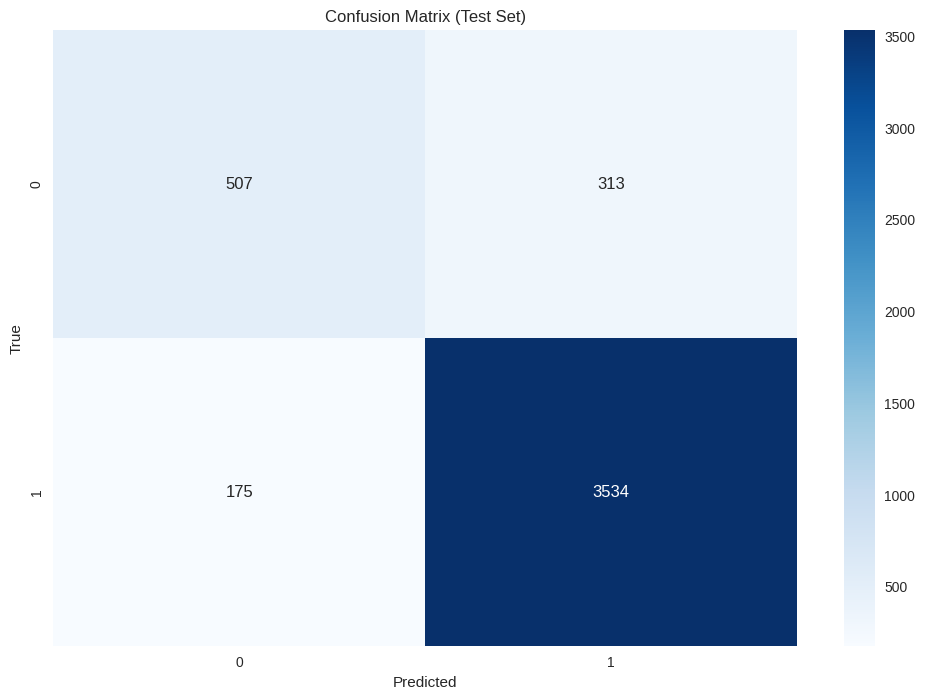

In [49]:
#@title Performance Analysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create a CountVectorizer for Bag-of-Words representation
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_count, y_train)

# Evaluate the model on the test set
y_pred_test = log_model.predict(X_test_count)
print("LOG MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test))

# Evaluate the model on the train set
y_pred_train = log_model.predict(X_train_count)
print("Train_Set")
print(classification_report(y_train, y_pred_train))

# Plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [50]:
#@title Classification Report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8737853843875362

 precision-0          score for count : 0.6198367471316988

 recall-0             score for count : 0.7866567202906072

 f1-0                 score for count : 0.6930488180241353

 precision-1          score for count : 0.9498541932603203

 recall-1             score for count : 0.8930615256828058

 f1-1                 score for count : 0.920545946959572



Observation : Logistic Regression With CountVectorizer(BOW) above result

Precision Recall curve for logistic regression

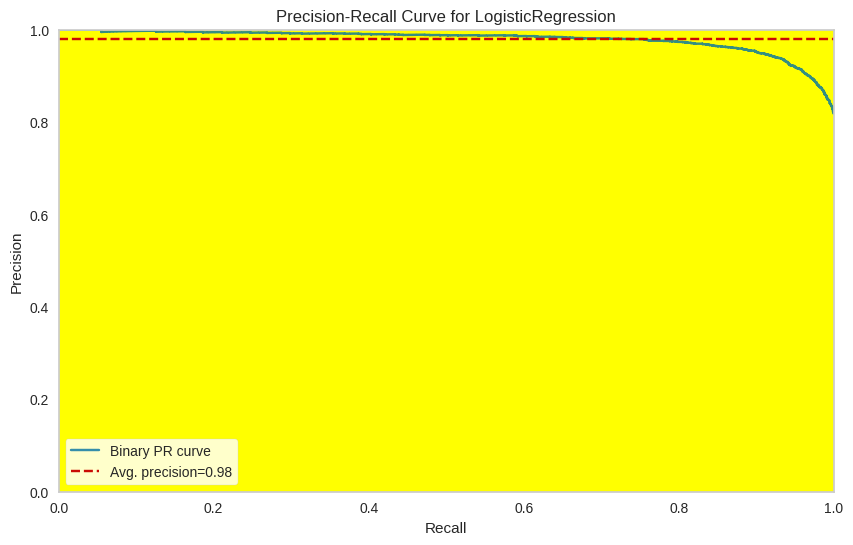

In [51]:
#@title Precision Recall Curve
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [63]:
log_AP_count = viz.score_

#   Logistic regression with TF-IDF vectorizer

In [ ]:

log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       820
           1       0.90      0.97      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.85      0.75      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.59      0.70      3281
           1       0.92      0.98      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.89      0.79      0.82     18112
weighted avg       0.90      0.91      0.90     18112



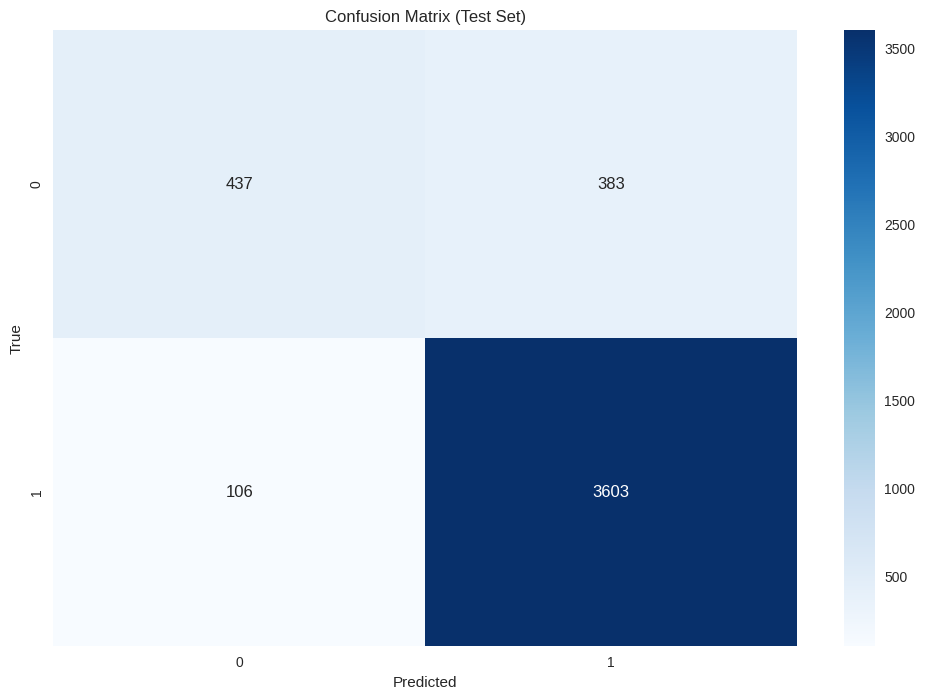

In [ ]:
#@title Performance Analysis
from sklearn.metrics import classification_report, confusion_matrix

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tf_idf = vectorizer.fit_transform(X_train)
X_test_tf_idf = vectorizer.transform(X_test)

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_tf_idf, y_train)

# Evaluate the model on the test set
y_pred_test = log_model.predict(X_test_tf_idf)
print("LOG MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test))

# Evaluate the model on the train set
y_pred_train = log_model.predict(X_train_tf_idf)
print("Train_Set")
print(classification_report(y_train, y_pred_train))

# Plot the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
#@title Classification Report
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8605887128329085

 precision-0          score for tfidf : 0.5792981526504878

 recall-0             score for tfidf : 0.8457780413670397

 f1-0                 score for tfidf : 0.6874044068054663

 precision-1          score for tfidf : 0.9620405901777529

 recall-1             score for tfidf : 0.8638654526684274

 f1-1                 score for tfidf : 0.9102738353858217



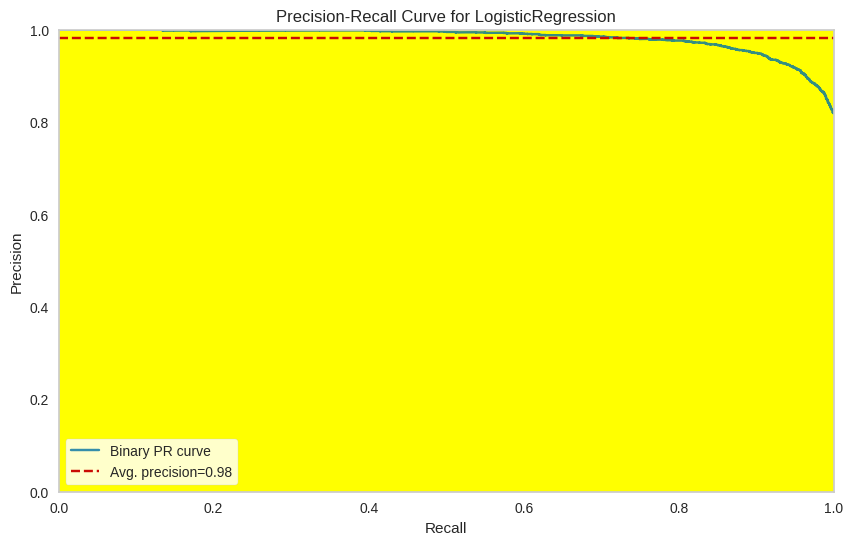

In [52]:
#@title Precision Recall Curve
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

# Comparison of result of Logistic Regression from both BOW and TF-IDF

Metric	      BOW	TF-        IDF

Accuracy      0.89	       0.86

Precision-0	  0.80	      0.58

Recall-0	   0.53	       0.85

F1-score-0	 0.64	      0.69

Precision-1	 0.90	     0.96

Recall-1	   0.97	     0.86

F1-score-1   0.94	    0.91

Overall, the TF-IDF representation resulted in slightly lower accuracy but higher precision and F1-score for class 1, making it a better choice for this specific classification task.

In [62]:
log_AP_tfidf = viz.score_

# 2 Naive Baye



In [53]:
#@title  Naive Bayes With Count Vectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [54]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

MultinomialNB()

In [ ]:
# !pip install --upgrade scikit-learn


NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.82      0.78      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3281
           1       0.95      0.95      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.86      0.86      0.86     18112
weighted avg       0.92      0.92      0.92     18112



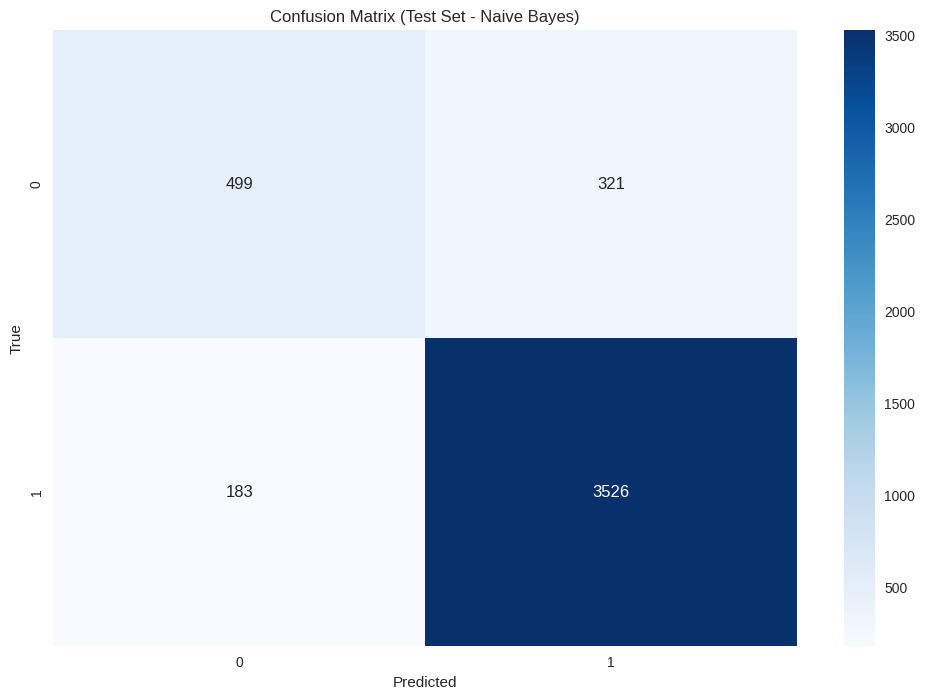

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set using the trained Naive Bayes model
y_pred_test_nb = nb.predict(X_test_count)
print("NB MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test_nb))

# Predict labels for the train set using the trained Naive Bayes model
y_pred_train_nb = nb.predict(X_train_count)
print("Train_Set")
print(classification_report(y_train, y_pred_train_nb))

# Plot the confusion matrix for the test set
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(conf_matrix_test_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set - Naive Bayes)")
plt.show()


In [65]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.887478531368885

 precision-0          score for count : 0.6754795463197872

 recall-0             score for count : 0.7305795462969826

 f1-0                 score for count : 0.7015809250952294

 precision-1          score for count : 0.9393426527773728

 recall-1             score for count : 0.9221897588664341

 f1-1                 score for count : 0.9306569836209034



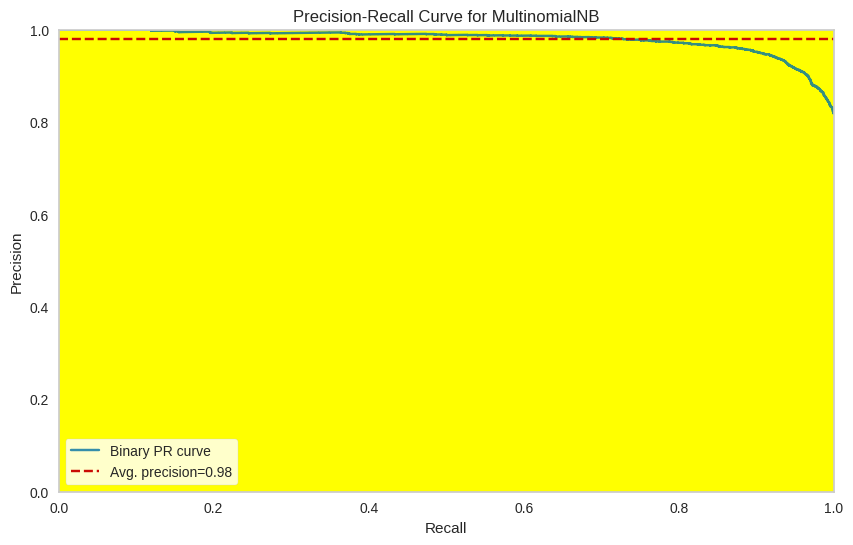

In [66]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [67]:
nb_AP_count = viz.score_

In [68]:
#@title Naive Bayes with TF-IDF Vectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.02      0.04       820
           1       0.82      1.00      0.90      3709

    accuracy                           0.82      4529
   macro avg       0.88      0.51      0.47      4529
weighted avg       0.84      0.82      0.75      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.05      0.09      3281
           1       0.83      1.00      0.90     14831

    accuracy                           0.83     18112
   macro avg       0.90      0.52      0.50     18112
weighted avg       0.85      0.83      0.76     18112



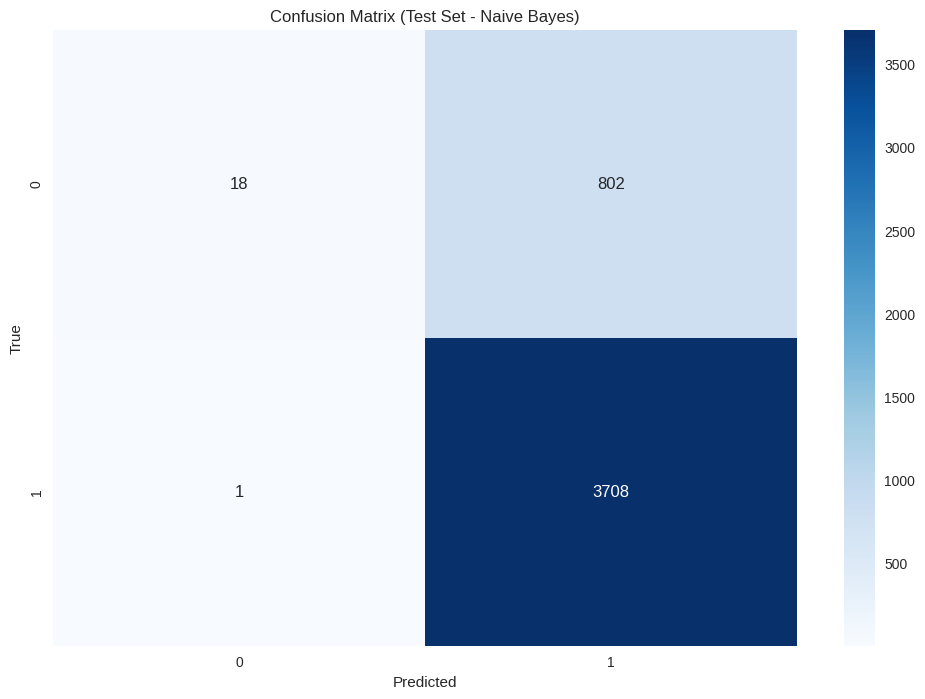

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set using the trained Naive Bayes model
y_pred_test_nb = nb.predict(X_test_tf_idf)
print("NB MODEL")
print("Test_Set")
print(classification_report(y_test, y_pred_test_nb))

# Predict labels for the train set using the trained Naive Bayes model
y_pred_train_nb = nb.predict(X_train_tf_idf)
print("Train_Set")
print(classification_report(y_train, y_pred_train_nb))

# Plot the confusion matrix for the test set
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(conf_matrix_test_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set - Naive Bayes)")
plt.show()


In [70]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8716875227789946

 precision-0          score for tfidf : 0.6400284622488551

 recall-0             score for tfidf : 0.6674799836904144

 f1-0                 score for tfidf : 0.6530656100285592

 precision-1          score for tfidf : 0.9257909000142936

 recall-1             score for tfidf : 0.916863355222622

 f1-1                 score for tfidf : 0.9212745474206834



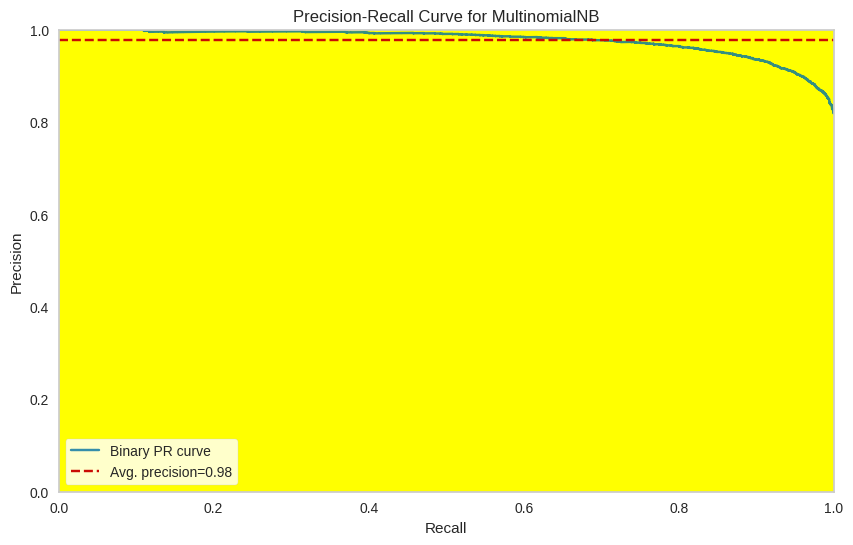

In [71]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [72]:
nb_AP_tfidf = viz.score_

# Comparing the models

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count",
                                   "NaiveBayes_tfidf", "LogReg_tfidf",
                                  ],

                        "F1_Score": [nb_count_f1, log_count_f1,
                                     nb_tfidf_f1, log_tfidf_f1,
                                    ],

                        "Recall_Score": [nb_count_rec, log_count_rec,

                                         nb_tfidf_rec, log_tfidf_rec,
                                        ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count,
                                                    nb_AP_tfidf, log_AP_tfidf,
                                                    ]})

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

#LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the LSTM model
embedding_dim = 100  # Dimensionality of the word vectors
lstm_units = 64  # Number of LSTM units
model = Sequential()
model.add(Embedding(input_dim=len(X_train_word2vec[0]), output_dim=embedding_dim, input_length=len(X_train_word2vec[0])))
model.add(LSTM(units=lstm_units))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary sentiment classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_word2vec, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_word2vec, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')